In [12]:
# polynomial regression
# ---------------------
# load data
import pandas as pd

df = pd.read_csv('./boston_house_prices.csv', header=None)
df.columns = df.iloc[0, :]
df = df.drop([0])
print(df.head())


0     CRIM  ZN INDUS CHAS    NOX     RM   AGE     DIS RAD  TAX PTRATIO  \
1  0.00632  18  2.31    0  0.538  6.575  65.2    4.09   1  296    15.3   
2  0.02731   0  7.07    0  0.469  6.421  78.9  4.9671   2  242    17.8   
3  0.02729   0  7.07    0  0.469  7.185  61.1  4.9671   2  242    17.8   
4  0.03237   0  2.18    0  0.458  6.998  45.8  6.0622   3  222    18.7   
5  0.06905   0  2.18    0  0.458  7.147  54.2  6.0622   3  222    18.7   

0       B LSTAT  MEDV  
1   396.9  4.98    24  
2   396.9  9.14  21.6  
3  392.83  4.03  34.7  
4  394.63  2.94  33.4  
5   396.9  5.33  36.2  


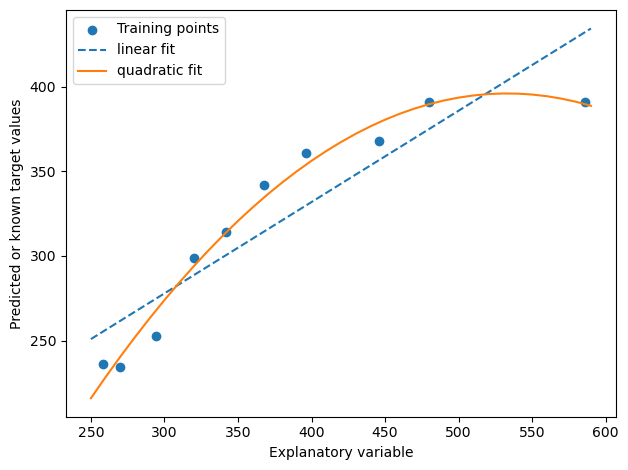

MSE: Linear: 569.780, quadratic: 61.330
R2: Linear: 0.832, quadratic: 0.982


In [13]:
# 1. polynomial
# transform univairate linear data into quadratic one

import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = np.array([258.0, 270.0, 294.0, 320.0, 342.0, 
              368.0, 396.0, 446.0, 480.0, 586.0])[:, np.newaxis]
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 
              342.2, 360.8, 368.0, 391.2, 390.8])
lr = LinearRegression()
pr = LinearRegression()
poly = PolynomialFeatures(degree=2)  # add a power of 2 variable, which is quadratic

lr.fit(X, y)
pr.fit(poly.fit_transform(X), y)

X_plot = np.arange(250, 600, 10)[:, np.newaxis]
y_plot_lin = lr.predict(X_plot)
y_plot_quad = pr.predict(poly.fit_transform(X_plot))

import matplotlib.pyplot as plt

plt.scatter(X, y, label='Training points')
plt.plot(X_plot, y_plot_lin, 
         label='linear fit', linestyle='--')
plt.plot(X_plot, y_plot_quad, 
         label='quadratic fit')
plt.xlabel('Explanatory variable')
plt.ylabel('Predicted or known target values')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# MSE and R^2 to evaluate

from sklearn.metrics import mean_squared_error, r2_score

y_pred_lin = lr.predict(X)
y_pred_quad = pr.predict(poly.fit_transform(X))

print('MSE: Linear: %.3f, quadratic: %.3f\nR2: Linear: %.3f, quadratic: %.3f' % (mean_squared_error(y, y_pred_lin), 
                                                                                 mean_squared_error(y, y_pred_quad), 
                                                                                 r2_score(y, y_pred_lin), 
                                                                                 r2_score(y, y_pred_quad)))  # r2 is more explainable for selecting model or data

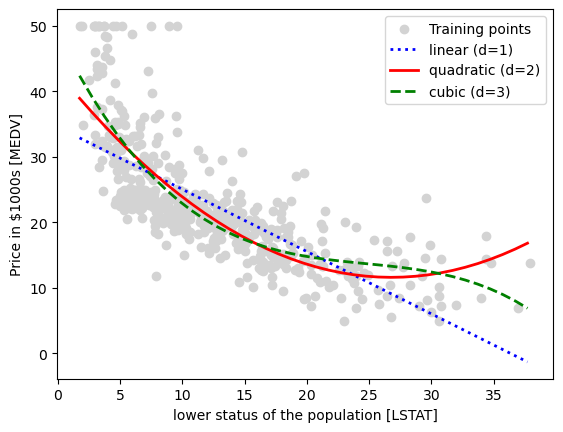

R^2scores
linear: 0.544, quadratic: 0.641, cubic: 0.658


In [14]:
# train model

# 1. set up training data
X = df[['LSTAT']].values.astype(float) # sklearn's model require 2d-array for 'X' parameter
y = df['MEDV'].values.astype(float)  # sklearn's model require 1d-array for 'y' parameter

lr = LinearRegression()

# 2. transform linear data to quadratic or cubic
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# 3. train(fit) model
# we didn't split data into train or validation, so create one for prediction

X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

lr = lr.fit(X, y)
y_pred_lin = lr.predict(X_fit)

lr = lr.fit(X_quad, y)
y_pred_quad = lr.predict(quadratic.fit_transform(X_fit))

lr = lr.fit(X_cubic, y)
y_pred_cubic = lr.predict(cubic.fit_transform(X_fit))

# 4. visualize
plt.scatter(X, y, label='Training points', 
            color='lightgrey')
plt.plot(X_fit, y_pred_lin, 
         label='linear (d=1)', 
         color='blue', 
         lw=2, 
         linestyle=':')
plt.plot(X_fit, y_pred_quad, 
         label='quadratic (d=2)', 
         color='red', 
         lw=2, 
         linestyle='-')
plt.plot(X_fit, y_pred_cubic, 
         label='cubic (d=3)', 
         color='green', 
         lw=2, 
         linestyle='--')
plt.xlabel('lower status of the population [LSTAT]')  # 
plt.ylabel('Price in $1000s [MEDV]')  # 
plt.legend(loc='upper right')
plt.show()

# 5. score
r2_lin = r2_score(y, lr.fit(X, y).predict(X))
r2_quad = r2_score(y, lr.fit(X_quad, y).predict(X_quad))
r2_cubic = r2_score(y, lr.fit(X_cubic, y).predict(X_cubic))
print('R^2scores\nlinear: %.3f, quadratic: %.3f, cubic: %.3f' % (r2_lin, r2_quad, r2_cubic))

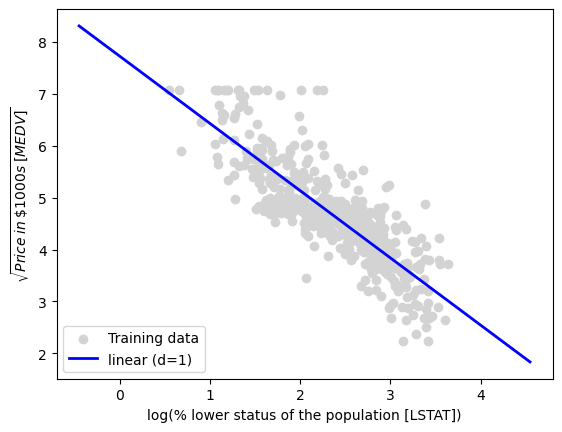

R2 score
linear: 0.691


In [15]:
# from scatter map we can see LSTAT and MEDV are in exponential correlation

# transform data to exponent
X_log = np.log(X)
y_sqrt = np.sqrt(y)

# train model
X_fit = np.arange(X_log.min()-1, 
                  X_log.max()+1, 
                  1)[:, np.newaxis]
lr = lr.fit(X_log, y_sqrt)
y_pred_lin = lr.predict(X_fit)
r2_lin = r2_score(y_sqrt, lr.predict(X_log))

# visualize
plt.scatter(X_log, y_sqrt, 
            label='Training data', 
            color='lightgrey')
plt.plot(X_fit, y_pred_lin, 
         label='linear (d=1)', 
         color='blue', 
         lw=2)
plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000s \; [MEDV]}$')
plt.legend(loc='lower left')
plt.show()

print('R2 score\nlinear: %.3f' % r2_lin)

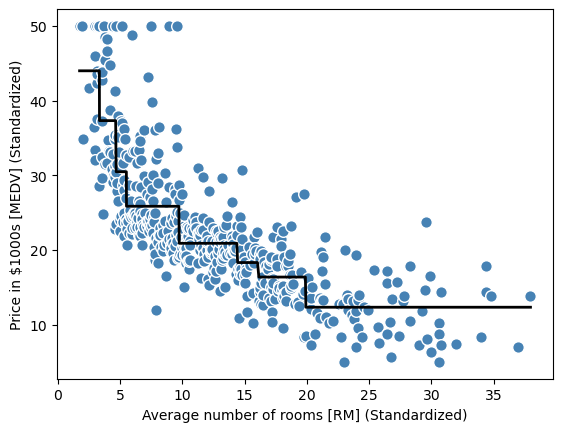

Forest MSE train: 1.644, test: 11.085
Forest r2 score train: 0.979, test: 0.877


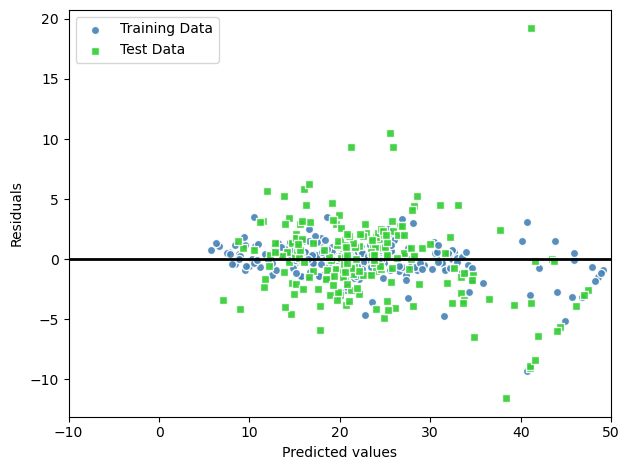

In [20]:
# Random Foresst and Decision Tree
# --------------------------------

# Decision Tree
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)
sort_idx = X.flatten().argsort()
plt.scatter(X[sort_idx], y[sort_idx], c='steelblue', edgecolor='white', s=70)
plt.plot(X[sort_idx], tree.predict(X[sort_idx]), color='black', lw=2)
plt.xlabel('Average number of rooms [RM] (Standardized)')
plt.ylabel('Price in $1000s [MEDV] (Standardized)')
plt.show()

# Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X_1 = df.iloc[:, :-1].values
y_1 = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.4, random_state=1)
forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='squared_error', 
                               random_state=1, 
                               n_jobs=-1)
forest.fit(X_train, y_train)

y_train = y_train.astype(float)
y_test = y_test.astype(float)

y_pred_train = forest.predict(X_train)
y_pred_test = forest.predict(X_test)
print('Forest MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_pred_train), 
                                       mean_squared_error(y_test, y_pred_test)))
print('Forest r2 score train: %.3f, test: %.3f' % (r2_score(y_train, y_pred_train), 
                                       r2_score(y_test, y_pred_test)))

# Rasidual Map
plt.scatter(y_pred_train, y_pred_train - y_train, 
            c='steelblue', edgecolor='white', 
            marker='o', s=35, alpha=0.9, label='Training Data')
plt.scatter(y_pred_test, y_pred_test - y_test, 
            c='limegreen', edgecolor='white', 
            marker='s', s=35, alpha=0.9, label='Test Data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()